In [91]:
import pandas as pd

df = pd.read_csv('/Users/gorazdfilipovski/PycharmProjects/VNP/data/aud_data/aud_4_and_5/Housing.csv')

In [55]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
205,4900000,6300,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
319,4060000,3000,4,1,3,yes,no,yes,no,yes,2,no,semi-furnished
50,7420000,7440,3,2,4,yes,no,no,no,no,1,yes,unfurnished
190,5040000,7600,4,1,2,yes,no,no,no,yes,2,no,furnished
87,6475000,3960,3,1,1,yes,no,yes,no,no,2,no,semi-furnished


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


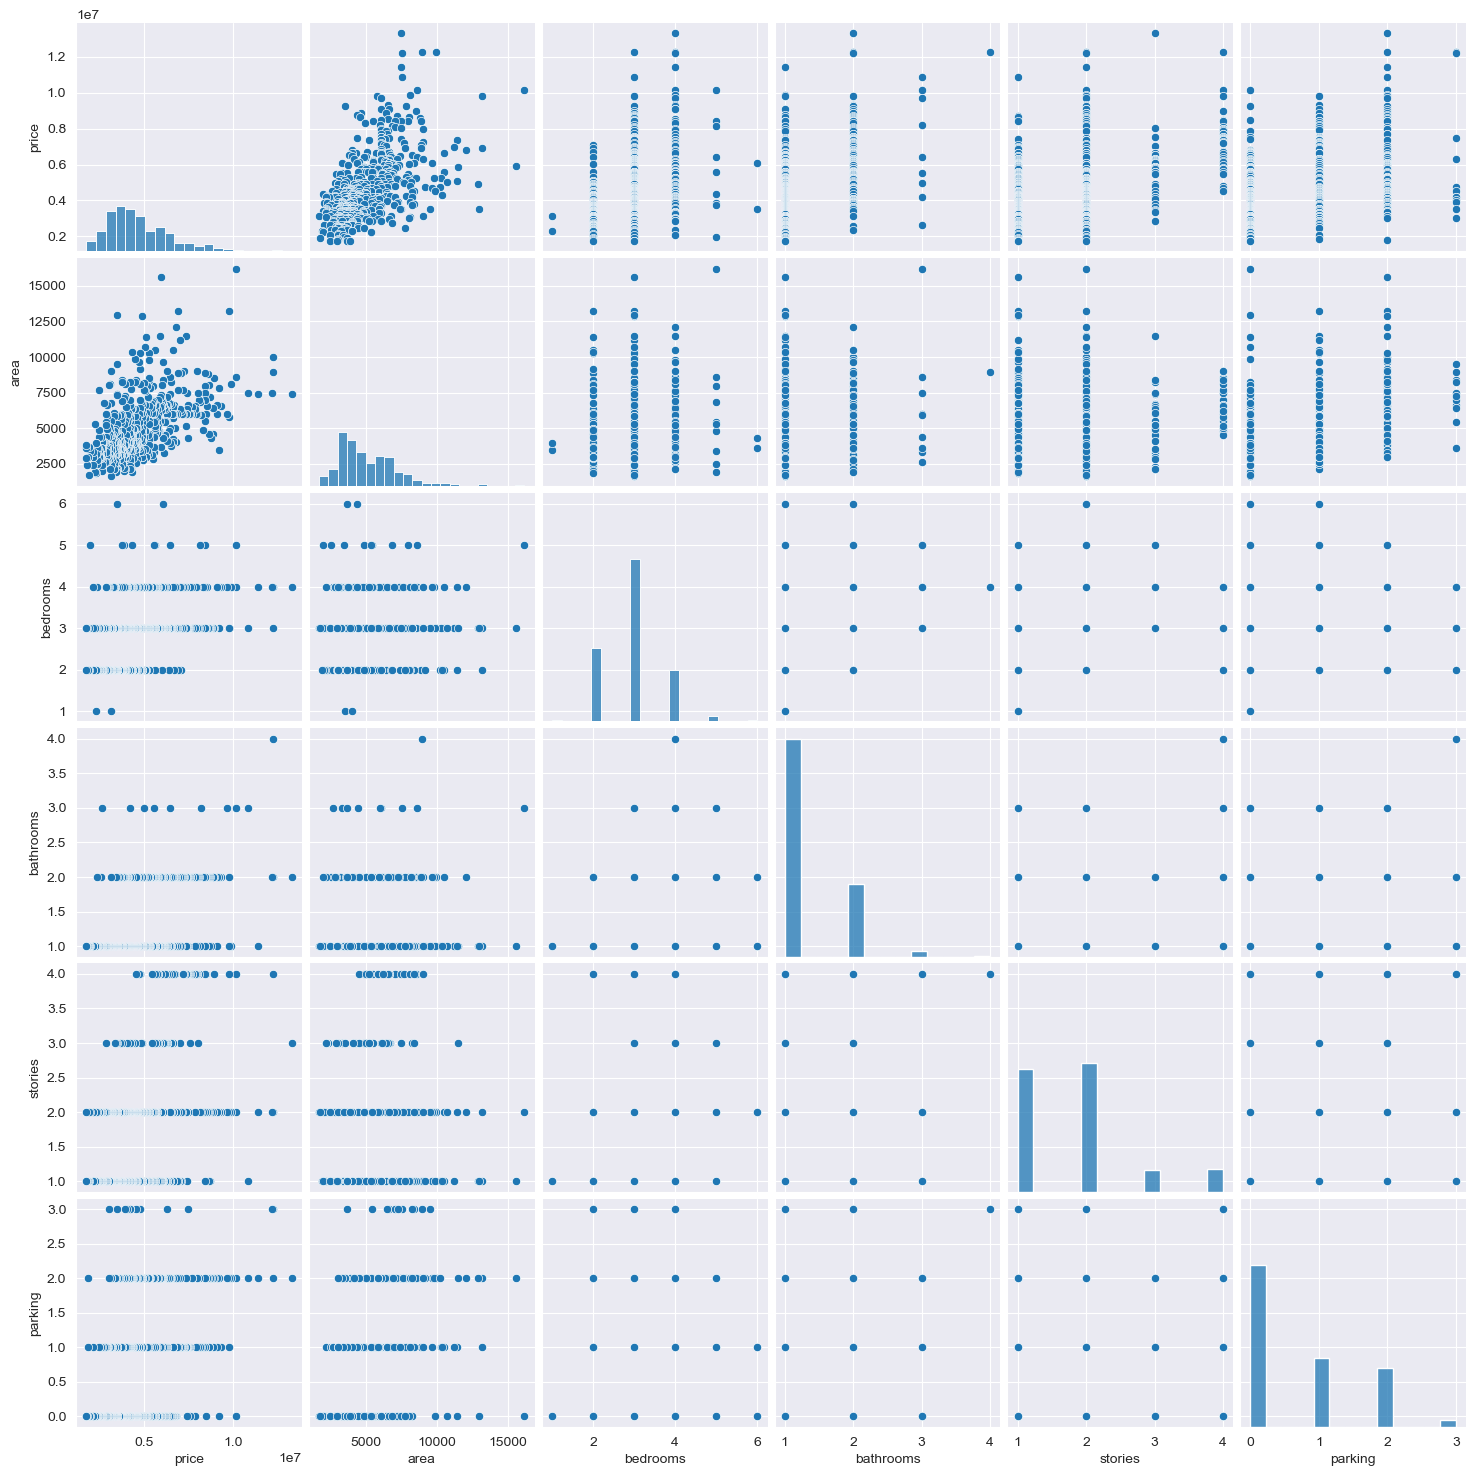

In [57]:
import seaborn as sns

sns.pairplot(df)

In [58]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [59]:
for column in df.columns:
    if type(df[column].to_list()[0]) == str:
         df[column] = encoder.fit_transform(df[column])

In [60]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [61]:
df["price"].count()

545

In [62]:
X = df.drop(['price'],axis=1)
Y = df.price

In [63]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [65]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
len(model.coef_)

12

In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#sqrt(y_test-y_pred)^2
mean_squared_error(y_test,y_pred)

1607036296842.4932

In [69]:
mean_absolute_error(y_test,y_pred)

903070.9148020622

In [70]:
r2_score(y_test,y_pred) #0-1

0.6491544399896257

In [71]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
model.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)

In [73]:
r2_score(y_test,y_pred)

0.41672886536871256

In [74]:
import matplotlib.pyplot as plt
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [75]:
r2_scores = []
for i in range(1,10):
    poly = PolynomialFeatures(degree=i)
    model = LinearRegression()
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model.fit(X_train_poly,y_train)
    y_pred = model.predict(X_test_poly)
    r2_scores.append(r2_score(y_test,y_pred))

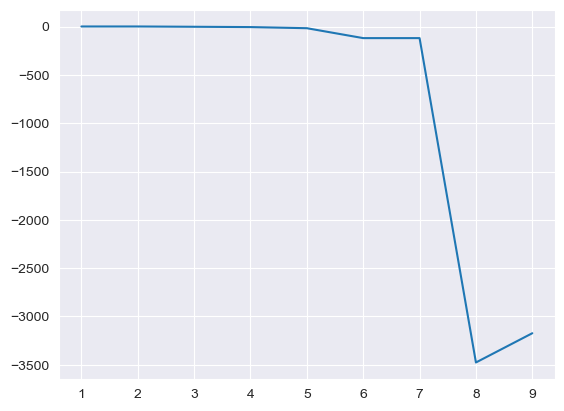

In [77]:
plt.plot([i for i in range(1,10)],r2_scores)


In [78]:
print(max(r2_scores))

0.6871111979664624


In [79]:
from sklearn.linear_model import Ridge

In [80]:
model = Ridge(alpha = 0.2)
model.fit(X_train,y_train)

Ridge(alpha=0.2)

In [81]:
y_pred = model.predict(X_test)

In [82]:
r2_score(y_test,y_pred)

0.6797840502509865

In [83]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge()

In [84]:
model.fit(X_train,y_train)

KernelRidge()

In [85]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.679905257130106

In [86]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3,min_samples_leaf=5,max_leaf_nodes=10,min_samples_split=5)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=10, min_samples_leaf=5,
                      min_samples_split=5)

In [87]:
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4006029652234355

In [89]:
X_train['bedrooms']

32     4
147    3
319    4
171    3
182    3
      ..
111    3
278    3
475    2
149    4
34     5
Name: bedrooms, Length: 436, dtype: int64